In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Data Preprocessing
# Selecting relevant features: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

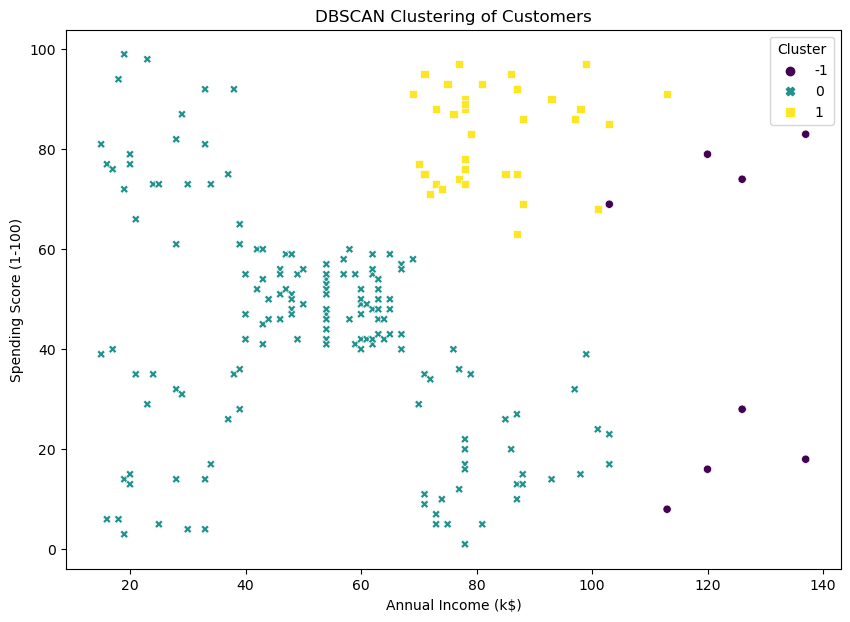

In [4]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to tune these parameters
data['Cluster'] = dbscan.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 7))
# Plotting noise as a separate category
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', data=data, palette='viridis', style='Cluster', markers=['o', 'X', 's'])
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()